# Preprocessing for Evaluation
To evaluate the trust mining method, we use several bpmn diagrams, mesaure their features, mining time and metrics and compare them

In [55]:
import pandas as pd
import numpy as np

This is the first dataset from BPMN 6219 and from the Unicam set. See here: https://ieee-dataport.org/documents/6219-pairs-bpmn-images-and-definition-files

In [56]:
bpmn_6219_81 = pd.read_csv("../evaluation_bpmn6219_81.csv")

In [57]:
valid_bpmn_6219_81_df = bpmn_6219_81[bpmn_6219_81["modelIsValidBPMN"]]

In [58]:
len(valid_bpmn_6219_81_df)

742

In [59]:
len(valid_bpmn_6219_81_df[valid_bpmn_6219_81_df["modelNP"]>1])

358

In [60]:
usable_bpmn_6219_81_df = valid_bpmn_6219_81_df[valid_bpmn_6219_81_df["modelNP"]>1]

In [61]:
usable_bpmn_6219_81_df.dtypes

fileName                            object
modelIsValidBPMN                      bool
modelTNT                             int64
modelTNCS                            int64
modelTNA                             int64
modelTNDO                            int64
modelTNG                             int64
modelTNEE                            int64
modelTNIE                            int64
modelTNSE                            int64
modelTNE                             int64
modelTNSF                            int64
modelNP                              int64
modelNL                              int64
modelCLA                           float64
modelCLP                           float64
modelPDOPin                        float64
modelPDOPout                       float64
modelPDOTOut                       float64
modelPLT                           float64
tapeGU                               int64
tapeALU                            float64
tapeRLU                             object
tapeLUB    

In [62]:
usable_bpmn_6219_81_df.head()

,fileName,modelIsValidBPMN,modelTNT,modelTNCS,modelTNA,modelTNDO,modelTNG,modelTNEE,modelTNIE,modelTNSE,...,endEventRequiredErrors,startEventRequiredErrors,fakeJoinErrors,noDisconnectedErrors,superfluousGatewayErrors,subProcessBlankStartEventErrors,noGatewayJoinForkErrors,noImplicitSplitErrors,noInclusiveGatewayErrors,conditionalFlowErrors
5,00005.bpmn,True,15,0,15,0,4,3,1,1,...,0,0,3,0,0,0,0,0,0,0
13,00013.bpmn,True,11,0,11,0,2,2,3,3,...,0,0,2,0,0,0,0,0,0,0
14,00014.bpmn,True,11,0,11,0,2,3,4,4,...,0,0,1,0,0,0,0,0,0,0
18,00018.bpmn,True,15,0,15,0,4,3,1,1,...,0,0,3,0,0,0,0,0,0,0
35,00035.bpmn,True,15,0,15,0,4,3,1,1,...,0,0,3,0,0,0,0,0,0,0


In [63]:
usable_bpmn_6219_81_df["tapeExecutionTimeMs"].head(20)

5      46.121494
13     22.819357
14     35.124959
18     30.960546
35     23.040152
38     28.452133
46     28.178714
47     28.071766
49     26.953629
55     23.561386
68     21.273721
69     35.785796
86      8.943993
92     19.064472
114    22.489357
115    24.856078
124    20.922564
130    20.304938
145    31.712726
150    24.992244
Name: tapeExecutionTimeMs, dtype: float64

In [52]:
usable_bpmn_6219_81_df["modelNP"].unique()

array([3, 2, 4])

<AxesSubplot:>

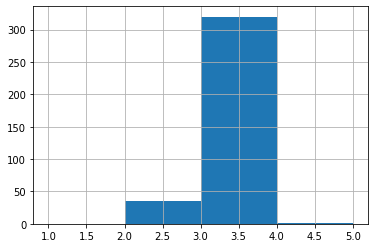

In [54]:
usable_bpmn_6219_81_df["modelNP"].hist(bins=[1, 2, 3, 4, 5])

## Characteristics
To get an overview over the raw dataset, we use violin plots to show the distribution of certain characteristics in the models and compare them later to the Metrics introduced with Trust Mining.

In [66]:
import seaborn as sns

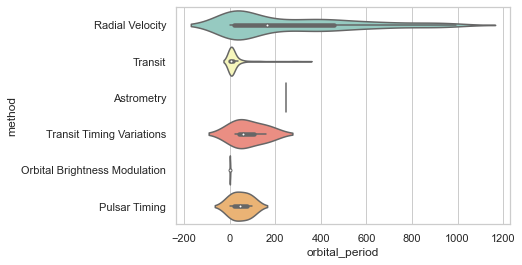

In [68]:
planets = sns.load_dataset("planets")
ax = sns.violinplot(x="orbital_period", y="method", data=planets[planets.orbital_period < 1000], scale="width", palette="Set3")

In [69]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [83]:
static_characteristics = usable_bpmn_6219_81_df[['modelTNT', 'modelTNCS', 'modelTNA',
                                                'modelTNDO', 'modelTNG', 'modelTNEE', 'modelTNIE', 'modelTNSE',
                                                'modelTNE', 'modelTNSF', 'modelNP', 'modelNL', 'modelCLA', 'modelCLP',
                                                'modelPDOPin', 'modelPDOPout', 'modelPDOTOut', 'modelPLT', 'tapeGU',
                                                'tapeALU', 'tapeRLU', 'tapeLUB', 'tapeAvgLUB',
                                                'tapeAvgDI', 'tapeAvgDD', 'tapeAvgMI', 'tapeAvgMD',
                                                'tapeExecutionTimeMs', 'applicationDomain', 'endEventRequiredErrors',
                                                'startEventRequiredErrors', 'fakeJoinErrors', 'noDisconnectedErrors',
                                                'superfluousGatewayErrors', 'subProcessBlankStartEventErrors',
                                                'noGatewayJoinForkErrors', 'noImplicitSplitErrors',
                                                'noInclusiveGatewayErrors', 'conditionalFlowErrors']]

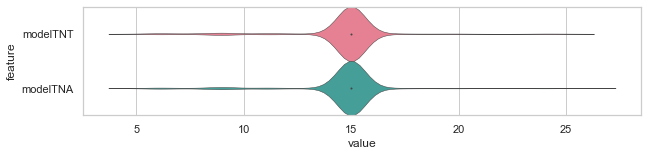

In [178]:
raw_model_characteristics_activities = usable_bpmn_6219_81_df[['modelTNT', 'modelTNA']]
raw_model_characteristics_activities_series_stacked = raw_model_characteristics_activities.stack()
raw_model_characteristics_activities_series_stacked.index = raw_model_characteristics_activities_series_stacked.index.droplevel(level=0)
raw_model_characteristics_activities_df = pd.DataFrame(raw_model_characteristics_activities_series_stacked).reset_index()
raw_model_characteristics_activities_df.columns = ['feature', 'value']
ax = sns.violinplot(x="value", y="feature", data=raw_model_characteristics_activities_df, scale="count", palette="husl", width=1, linewidth=0.5)
ax.figure.set_size_inches(10, len(raw_model_characteristics_activities_df["feature"].unique()))

In [165]:
raw_model_characteristics = usable_bpmn_6219_81_df[['modelTNDO', 'modelTNG', 'modelTNEE', 'modelTNIE', 'modelTNSE',
                                                'modelTNE', 'modelNP', 'modelNL', 'modelCLA', 'modelCLP',
                                                'modelPDOPin', 'modelPDOPout', 'modelPDOTOut', 'modelPLT']]

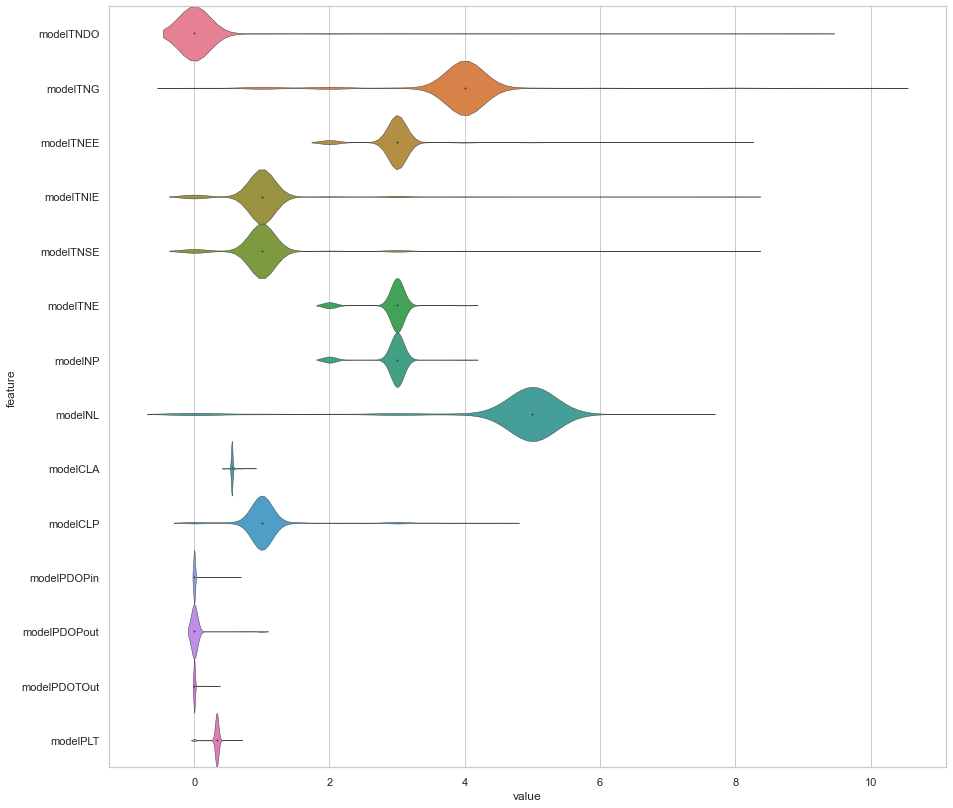

In [177]:
raw_model_characteristics_series_stacked = raw_model_characteristics.stack()
raw_model_characteristics_series_stacked.index = raw_model_characteristics_series_stacked.index.droplevel(level=0)
raw_model_df = pd.DataFrame(raw_model_characteristics_series_stacked).reset_index()
raw_model_df.columns = ['feature', 'value']
ax = sns.violinplot(x="value", y="feature", data=raw_model_df, scale="count", palette="husl", width=1, linewidth=0.5)
ax.figure.set_size_inches(15, len(raw_model_df["feature"].unique()))

14

In [168]:
raw_model_df.head()

,feature,value
0,modelTNDO,0.0
1,modelTNG,4.0
2,modelTNEE,3.0
3,modelTNIE,1.0
4,modelTNSE,1.0


In [169]:
import sys
!{sys.executable} -m pip install seaborn